# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

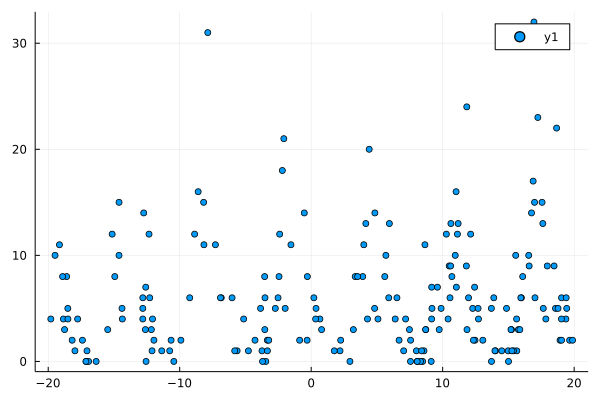

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -557.752108622834
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.645213 seconds (6.81 M allocations: 414.519 MiB, 2.73% gc time, 98.26% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.4078313747198582, 0.5153682217873589, 0.4090065127592897, 0.4554761242734844, 0.188203623216587, 0.24979285235787577, 0.42255817475345725, 0.30753718235241667, 0.27236592185529257, 0.27367798695141327  …  0.23207670491990892, 0.17259570499524665, 0.183754396757444, 0.3105963633870515, 0.274005342628012, 0.4499310116771727, 0.4269043997319878, 0.3311106532320271, 0.15387125502873164, 0.3227956474988815], θ = [12.329577321214458, 10.273607339521844, 7.39716597598952, 2.9491892279678322, 5.9823522050246085, 9.450909082558338, 2.956144052780679, 4.464865096000422, 6.9570450944539, 5.46592618698237  …  8.462053815671675, 3.4913372655085597, 3.9887826485170104, 3.4721317021313696, 8.944110379959557, 8.359451036443996, 10.34338716399045, 6.4412586953193705, 3.493110704974236, 3.9656257814231153]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTupl

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -693.8890726158716
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.472063 seconds (4.33 M allocations: 302.456 MiB, 2.97% gc time, 97.32% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 13.15338778845457) infered by Analytic Variational Inference , (local_vars = (c = [0.3679436558164533, 0.5098078216400144, 0.37369971288858495, 0.654716038455538, 0.2058972342953496, 0.1941764376753162, 0.5976052679222124, 0.2483171852572378, 0.1965081439912696, 0.23897482047789395  …  0.14959186351170878, 0.14327727703114984, 0.1632577122626217, 0.2557043747462432, 0.1902726521987972, 0.42519297398460854, 0.3964354811778978, 0.27225427373015226, 0.17560886172166387, 0.4464417971228722], θ = [12.590430037165515, 10.284061182984733, 7.618826255687006, 4.62026762703052, 6.949917911017549, 10.201122997129294, 4.5487133234735015, 5.027092584802474, 7.508926791389612, 6.254239414687087  …  9.138787706077839, 4.3594939423490375, 4.8773405571183135, 4.056117158984893, 9.590667137125516, 8.497962193884346, 10.53319202635385, 6.83756684068407, 4.453306340829441, 5.294396358294876], γ = [5.46430851253833, 5.011682669609478, 5.414571193

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

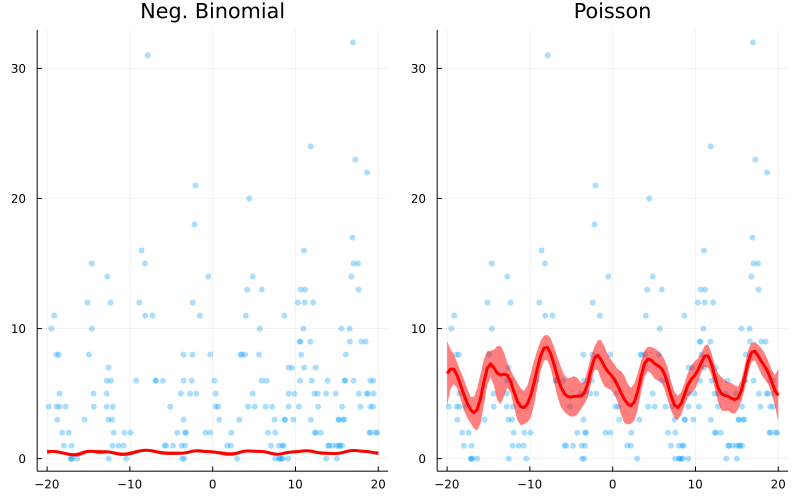

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*